# Pandenomics

## The Bruhs' Final Report

* Aleksandar Kartelyan
* Karan Shah
* Ramzi Rimawi
* Thomas Sobczak
* Ryan Thommes

# Project Introduction
The Covid-19 pandemic has caused inflation across the nation, thus increasing cost in all stages in production of goods. Inflation and increased prices of goods and services affects everyone in the country from workers to businesses to everyday people. Our goal is to analyze different impacts the COVID-19 pandemic has had on the economy and the nation overall. And our question is, how drastically has the COVID-19 pandemic caused prices to increase in the US?

# Data Cleaning
Retrieved and downloaded CSV from database and used pandas to clean and store data in a dataframe for easy use. The data used is Consumer Price Index (CPI) from https://www.bls.gov/data/. The data was filtered for All Urban Consumers data from 2000-2022.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import random
from scipy import stats


data_cols = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','HALF1','HALF2']

data = pd.read_csv("CPI-U.csv", names=data_cols)
data = data.iloc[1: , :]
data.drop(data.iloc[:, 13:15], inplace = True, axis = 1)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.head(4) #rows 1-4 shows years 2000-2003, but the data goes from 2000 - 2022

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0
2,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3


# Exploratory Data Analysis

For data granularity the CPI data was collected monthly for each U.S. city it includes cost averages in food, energy, gasoline, etc. The monthly CPI data was aggregated by year in each group (pre-Covid and post-Covid). The dataset had incomplete or missing data for th year 2022 because the year is not yet finished. We replaced the missing data values with Nan values. We also looked at different data sources (PPI).


# Data Visualization

## CPI pre-Covid

Text(0, 0.5, 'Average CPI')

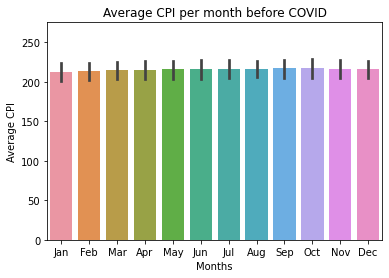

In [56]:
pre_covid_yrs = data[(data['Year'] <= '2019')].astype(float)
covid_yrs = data[(data['Year'] > '2019') & (data['Year'] < '2022')].astype(float)

pre_covid_yrs.drop('Year', axis=1, inplace=True)
covid_yrs.drop('Year', axis=1, inplace=True)

p = sns.barplot(data = pre_covid_yrs)
p.set(ylim=(0,275))
p.set(title='Average CPI per month before COVID')
p.set_xlabel("Months")
p.set_ylabel("Average CPI")


In the code above we calculated average CPI per month from the years 2000 to 2019 (pre_covid_yrs) and 2020 to 2021 (covid_yrs). This first bar graph shows the average CPI per month pre covid from 2000 to 2019. Our data was separated by months, which is one of the reasons why we displayed the monthly averages in the bar graph. There is a small difference in monthly averages, but we can see that the CPI average was a bit over 200.

## CPI post-Covid

Text(0, 0.5, 'Average CPI')

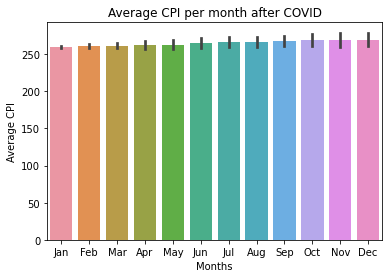

In [58]:
pn = sns.barplot(data = covid_yrs)
p.set(ylim=(0,275))
pn.set(title='Average CPI per month after COVID')
pn.set_xlabel("Months")
pn.set_ylabel("Average CPI")

This second bar graph shows the average CPI per month post covid from 2020 to 2021. The average CPI here is a bit over 250. From the 2 graphs, we can see that CPI since the pandemic started has been much higher than before the pandemic, representing a stark increase from inflation.

## CPI over last 10 years

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Average CPI'),
 Text(0.5, 1.0, 'Average CPI per year 2013-2022')]

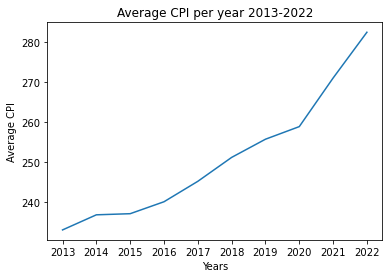

In [66]:
#Average CPI values per year for the last 10 years
#Visualized in a line graph

covid = data.astype(float)
covid.drop('Year', axis=1, inplace=True)

covid['average'] = covid.mean(axis=1)
covid.drop(covid.iloc[:, 0:12], inplace=True, axis=1)
data_cols = ['2013','2014','2015', '2016',
            '2017', '2018', '2019', '2020', '2021', '2022']
a=sns.lineplot(data=covid[-10:], x=data_cols, y="average")
a.set(xlabel="Years", ylabel="Average CPI", title='Average CPI per year 2013-2022')

To better represent the CPI values, we created a line graph showing the yearly average CPI from the past 10 years. This graph gives us a more focused look on CPI increase over time in recent years. Based on the graph, you can see that from 2020 to 2022, CPI increased at a much higher rate that the initial increase from 2013 to 2020.

## Before vs. After COVID

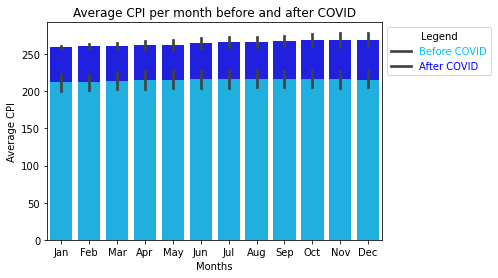

In [60]:
# Stacked bar graph showing difference from before and after COVID
pl = sns.barplot(data = covid_yrs, color="Blue")
pl = sns.barplot(data = pre_covid_yrs, color="deepskyblue")
pl.set(title='Average CPI per month before and after COVID')
pl.set(xlabel="Months", ylabel="Average CPI")
leg = pl.legend(labels=["Before COVID","After COVID"], title = "Legend", loc = 2, bbox_to_anchor = (1,1))
text = leg.get_texts()
text[0].set_color("deepskyblue")
text[1].set_color("Blue")

As shown in the bar graph above, we can can see the bars in light blue being the average in CPI before COVID and the bars being in dark blue the average CPI after COVID. In the visualization we can observe the difference in the 2 averages with the dark blue bars being higher in CPI than the light blue bars. As a result we can say that the average CPI after COVID was much higher than the average CPI before COVID because of the dark blue bars being greater than the light blue bars.

# ML Analysis

The following cell contains the first ML Analysis which uses a regression model trained with the monthly CPI data of years 2000-2019 and it is used to predict the CPI for 2020 and 2021, since our goal is to determine whether CPI has changed in the last two years. For the baseline model, we used an inflation rate of 3.8% which is the average inflation of the last two decades. For training/test split we used 80% of the dataset (randomly picked 16 years) as the training data and 20% of our dataset (4 years) as the testing data. The Linear Regression predictor had an  error of about 1.12% on the training data and 0.97% error on the testing data. On the other hand, the Basline predictor had an error of 8.99% on the training data and an error of 3.13% on the testing data.

The Regression model predicted 260.79 as the average CPI for 2020 and 265.12 as the average CPI for 2021, while the actual average CPI turned out to be 258.81 (lower than expected) for 2020 and 270.97 (higher than expected) for 2021, resulting in an error of about 1.46% for the model.

In [61]:
a = []
b = []
c = [2020, 2021]
data[data['Year'] == '2019'].astype(float).aggregate(func = 'average')
for x in range(2000,2020):
    a.append(float(x))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    b.append(pd.aggregate(func = 'average'))
    

a_1 = b
a = np.array(a).reshape(-1, 1)
b = np.array(b).reshape(-1, 1)
c = np.array(c).reshape(-1, 1)

index_test = random.sample(range(0, 20), 3)

# Baseline Predictor using average inflation of 3.8% (average inflation as mentioned by worlddata.info)
baseline_numbers = [b[0][0]]
for x in range(1, 20):
    baseline_numbers.append(1.031 * baseline_numbers[x - 1])

error3 = 0
for i in range (20):
    if (i not in index_test):
        error3 += 100 * abs(baseline_numbers[i] - b[i]) / b[i]
    
error3 = error3 / 16
    
print("Baseline Training Error:", error3[0], "%")

error4 = 0
for elem in index_test:
    error4 += 100 * abs(baseline_numbers[elem] - b[elem]) / b[elem]

error4 = error4 / 4

print("Baseline Testing Error:", error4[0], "%")

print()

linear_regressor = LinearRegression()  # create object for the class

a_2 = a.copy()

b_2 = b.copy()
a_2 = np.delete(a_2, index_test)
b_2 = np.delete(b_2, index_test)

a_2 = np.array(a_2).reshape(-1, 1)
b_2 = np.array(b_2).reshape(-1, 1)

linear_regressor.fit(a_2, b_2)  # perform linear regression

error1 = 0
for i in range (20):
    if (i not in index_test):
        error1 += 100 * abs(linear_regressor.predict(a[i].reshape(-1, 1))[0][0] - b[i]) / b[i]

error1 = error1 / 16
print("Regression Training Error:", error1[0], "%")

error2 = 0
for elem in index_test:
    error2 += 100 * abs(linear_regressor.predict(a[elem].reshape(-1, 1))[0][0] - b[elem]) / b[elem]
    
error2 = error2 / 4
print("Regression Testing Error:", error2[0], "%")
print()

Y_pred = linear_regressor.predict(c)  # make predictions
print("Regression Prediction for 2020 and 2021")
print(Y_pred)
print()
    
error5 = 0
b_1 = []

for x in range(2020,2022):
    b_1.append(pd.aggregate(func = 'average'))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    cpi = pd.aggregate(func = 'average')
    error5 += 100 * abs(Y_pred[2020 - x][0] - cpi) / cpi
    print("Average CPI for " + str(x) + ": " + str(cpi))

error5 = error5 / 2
print("Model Error:", error5, "%")

Baseline Training Error: 8.990345976407896 %
Baseline Testing Error: 3.1349499477679963 %

Regression Training Error: 1.1213050375000915 %
Regression Testing Error: 0.9656394848415132 %

Regression Prediction for 2020 and 2021
[[260.78836315]
 [265.12497691]]

Average CPI for 2020: 258.8111666666667
Average CPI for 2021: 270.96975000000003
Model Error: 1.4604684596298028 %


## T-Test
- In our T-Test, we used significance value of 10% for checking if the values of CPI for 2020 and 2021 are different than expected
NULL Hypothesis- the CPI values for 2020 and 2021 are same as the average CPI during the past two decades
- Alternate Hypothesis- the CPI values for 2020 and 2021 are not the same as the average CPI during the past two decades
- The p-value from the t-test turned out to be .057, which is enough to conclude that we reject the NULL hypothesis that the CPI values for 2020 and 2021 aren't different

In [62]:
#T-Test for checking if the values of CPI for 2020 and 2021 are different than expected

stats.ttest_ind(a_1, b_1, trim=.2)

Ttest_indResult(statistic=-2.1035416905753723, pvalue=0.0571841055733711)

# Results:

In conclusion with what we saw with our visualizations, CPI increased at a higher rate than usual since the COVID pandemic started. We as a team infered that the pandemic was one of the main reasons as to what caused an increase in prices. According to our ML analysis it was predicted that the average CPI would be lower than what it actually was. Our model predicted, based on the 3.8% average inflation rate of the past 20 years, that in 2020 the CPI level would be around 260 and in 2021 the CPI level would be around 265. The actual average CPI for 2020 was 258.8, which was a bit lower than the prediction, but the average CPI for 2021 was 270.97 which exceeded the model's prediction by a lot.
We can definetely see that ever since the pandemic started CPI levels, as we used in this project, have been fluctuating greatly. For the most part, we cna see that prices are increasing at a much higher rate, with some exceptions in our data.